In [45]:
import pandas as pd
import numpy as np


**READING DATA USING PANDAS**

In [7]:
df=pd.DataFrame(pd.read_csv('/content/train (1).csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

**HANDLING NULL VALUES**

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**COLUMNS HAVING MORE THAN 35% MISSING VALUES**

In [10]:
x=df.isnull().sum()
columns=x[x>(35/100 * df.shape[0])]
columns

Cabin    687
dtype: int64

In [11]:
columns.index

Index(['Cabin'], dtype='object')

In [12]:
df.drop(columns.index,axis=1,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [17]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df['Embarked'].describe()

count     891
unique      4
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
df['Embarked'].fillna('S', inplace= True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.159651,0.216225,1.000000


**CREATING A NEW COLUMN**

In [23]:
df['Familysize']=df['Parch']+df['SibSp']
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Fare,Familysize
PassengerId,1.000000,-0.005007,-0.035144,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.549500,0.065997
Fare,0.012658,0.257307,-0.549500,1.000000,0.217138
Familysize,-0.040143,0.016639,0.065997,0.217138,1.000000


In [59]:
df['Alone']=[0 if df['Familysize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Familysize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35,373450,8.0500,S,0,1


In [25]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

**CORRELATION BETWEEN ALONE AND FARE PRICE**

In [29]:
df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


In [48]:
df['Sex']=[0 if df['Sex'][i]=='male' else 1 for i in df.index]
df.groupby(['Sex'])['Survived'].mean()

Sex
1    0.383838
Name: Survived, dtype: float64

In [47]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [46]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

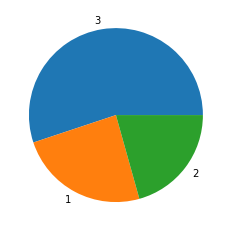

In [57]:
sorted_counts = df['Pclass'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index);

(array([537., 161., 102.,  29.,  15.,  22.,  12.,   6.,   0.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

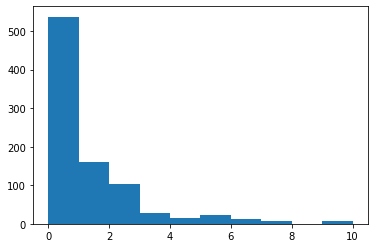

In [56]:
plt.hist(data = df, x = 'Familysize')

# PREDICTIONS AND CONCLUSIONS

* Female passengers were priotorized over men.
* People with high class or rich people have higher survival rate than others. The hierarichy might have been followed while saving the passengers.
* Passengers travelling with their family have higher survival rate.
* Passengers who boarded the ship at Chetbourg, survived more in proportion than the others.

**ADDITIONAL CONCLUSIONS**

* Passengers in 1-Pclass survived the most than the others.
* Fare has been more in 1-Pclass than the other classes.
* From the Pie Chart we see that, there are more number of 3-Pclasses than the other two classes.
* From the Histogram we conclude, that there were only less number of Families having a count more than 3.